# ================================================================
## EXPANDED MODEL COMPARISON ANALYSIS - 6 MACHINE LEARNING MODELS
# ================================================================
# Cell 0: Overview and Introduction

COMPREHENSIVE MODEL COMPARISON ANALYSIS
=======================================

This analysis compares the performance of six different machine learning models:

1. **Random Forest**: An ensemble method using multiple decision trees with voting
   - Strengths: Handles overfitting well, works with mixed data types, provides feature importance
   - Use case: Good general-purpose classifier for tabular data

2. **Logistic Regression (Multinomial)**: Linear model for classification using logistic function
   - Strengths: Fast, interpretable, probabilistic outputs, works well with linearly separable data
   - Use case: Baseline model, when interpretability is important

3. **K-Nearest Neighbors (KNN)**: Instance-based learning using distance metrics
   - Strengths: Simple, non-parametric, works well with small datasets
   - Use case: When local patterns are important, recommendation systems

4. **LightGBM**: Gradient boosting framework using tree-based learning
   - Strengths: Fast training, high accuracy, handles large datasets efficiently
   - Use case: Structured/tabular data competitions, when speed and accuracy are both important

5. **Support Vector Machine (SVM)**: Finds optimal hyperplane for classification
   - Strengths: Effective in high dimensions, memory efficient, versatile with kernel functions
   - Use case: Text classification, image classification, high-dimensional data

6. **Neural Networks**: Deep learning model with interconnected nodes
   - Strengths: Can learn complex non-linear patterns, flexible architecture
   - Use case: Complex pattern recognition, when large amounts of data are available

EVALUATION METRICS:
- Accuracy: Overall correctness of predictions
- F1-Score (Weighted & Macro): Balance between precision and recall
- Cross-validation metrics: Robustness assessment
- Confusion matrices: Detailed error analysis

This comprehensive comparison helps identify the best performing model for the specific dataset
and provides insights into each algorithm's strengths and weaknesses.

In [1]:
# ================================================================
# 1: Import Libraries
# ================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import joblib
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.style.use('default')
sns.set_palette(["#1f4e79", "#d62728", "#2ca02c", "#ff7f0e", "#9467bd", "#8c564b"])

print("📚 Libraries imported successfully!")
print("🔍 Ready to compare 6 machine learning models!")

📚 Libraries imported successfully!
🔍 Ready to compare 6 machine learning models!


In [2]:
# ================================================================
# 2: Define Model Paths and Load Metrics
# ================================================================

print("\n📂 LOADING MODEL METRICS AND RESULTS")
print("=" * 50)

# Define model information for all 6 models
models_info = {
    'Random Forest': {
        'name': 'random_forest_optimized',
        'display_name': 'Random Forest',
        'color': '#1f4e79',
        'description': 'Ensemble of decision trees'
    },
    'Logistic Regression': {
        'name': 'multinomial_logistic_regression_optimized',
        'display_name': 'Logistic Regression',
        'color': '#d62728',
        'description': 'Linear classification model'
    },
    'KNN': {
        'name': 'knn_optimized',
        'display_name': 'K-Nearest Neighbors',
        'color': '#2ca02c',
        'description': 'Instance-based learning'
    },
    'LightGBM': {
        'name': 'lightgbm_optimized',
        'display_name': 'LightGBM',
        'color': '#ff7f0e',
        'description': 'Gradient boosting framework'
    },
    'SVM': {
        'name': 'svm_optimized',
        'display_name': 'Support Vector Machine',
        'color': '#9467bd',
        'description': 'Maximum margin classifier'
    },
    'Neural Networks': {
        'name': 'neural_network_optimized',
        'display_name': 'Neural Networks',
        'color': '#8c564b',
        'description': 'Multi-layer perceptron'
    }
}

# Define paths based on actual structure (script runs from Notebooks/ folder)
base_dir = '../Data'
model_metrics_base = os.path.join(base_dir, 'model_metrics')
models_dir = os.path.join(model_metrics_base, 'models')
metrics_dir = os.path.join(model_metrics_base, 'metrics')
reports_dir = os.path.join(model_metrics_base, 'reports')

print(f"📁 Models directory: {models_dir}")
print(f"📁 Metrics directory: {metrics_dir}")
print(f"📁 Reports directory: {reports_dir}")

# Load metrics for each model
all_metrics = {}
all_reports = {}
all_confusion_matrices = {}
all_classification_reports = {}

for model_key, model_info in models_info.items():
    model_name = model_info['name']
    
    try:
        # Load metrics JSON from metrics/ subdirectory
        metrics_path = os.path.join(metrics_dir, f"{model_name}_metrics.json")
        with open(metrics_path, 'r') as f:
            all_metrics[model_key] = json.load(f)
        
        # Load classification report JSON from reports/ subdirectory
        report_path = os.path.join(reports_dir, f"{model_name}_classification_report.json")
        with open(report_path, 'r') as f:
            all_classification_reports[model_key] = json.load(f)
        
        # Load confusion matrix JSON from metrics/ subdirectory
        cm_path = os.path.join(metrics_dir, f"{model_name}_confusion_matrix.json")
        with open(cm_path, 'r') as f:
            cm_data = json.load(f)
            # Extract confusion matrix array and labels from JSON structure
            cm_matrix = cm_data['confusion_matrix']
            class_labels = cm_data.get('class_labels', list(range(len(cm_matrix))))
            
            # Convert to DataFrame with proper labels
            all_confusion_matrices[model_key] = pd.DataFrame(
                cm_matrix, 
                index=[f"True_{label}" for label in class_labels],
                columns=[f"Pred_{label}" for label in class_labels]
            )
        
        print(f"✅ {model_key}: Metrics loaded successfully")
        
    except Exception as e:
        print(f"❌ {model_key}: Error loading metrics - {str(e)}")

print(f"\n🎉 Loaded metrics for {len(all_metrics)} models!")

# Extract class information from classification reports
if all_classification_reports:
    sample_report = list(all_classification_reports.values())[0]
    class_labels = [key for key in sample_report.keys() if key.isdigit()]
    n_classes = len(class_labels)
    print(f"📊 Detected {n_classes} classes: {class_labels}")
else:
    class_labels = []
    n_classes = 0


📂 LOADING MODEL METRICS AND RESULTS
📁 Models directory: ../Data\model_metrics\models
📁 Metrics directory: ../Data\model_metrics\metrics
📁 Reports directory: ../Data\model_metrics\reports
✅ Random Forest: Metrics loaded successfully
✅ Logistic Regression: Metrics loaded successfully
✅ KNN: Metrics loaded successfully
✅ LightGBM: Metrics loaded successfully
✅ SVM: Metrics loaded successfully
✅ Neural Networks: Metrics loaded successfully

🎉 Loaded metrics for 6 models!
📊 Detected 3 classes: ['0', '1', '2']


In [3]:
# ================================================================
# 3: Create Comprehensive Metrics Comparison Table
# ================================================================

print("\n📊 COMPREHENSIVE MODEL PERFORMANCE COMPARISON")
print("=" * 60)

# Create comparison DataFrame
comparison_data = []
model_info_data = []

for model_name, metrics in all_metrics.items():
    # Extract test performance metrics from the JSON structure
    test_performance = metrics.get('test_set_performance', {})
    cv_results = metrics.get('cross_validation_results', {})
    cv_scores = cv_results.get('cv_scores_by_metric', {})
    model_info = metrics.get('model_info', {})
    hyperparams = metrics.get('hyperparameters', {})
    
    model_data = {
        'Model': model_name,
        'Accuracy': test_performance.get('accuracy', 0),
        'F1-Score (Weighted)': test_performance.get('f1_weighted', 0),
        'F1-Score (Macro)': test_performance.get('f1_macro', 0),
        'Precision (Weighted)': test_performance.get('precision_weighted', 
                               cv_scores.get('precision_weighted', {}).get('mean', 0) if cv_scores.get('precision_weighted') else 0),
        'Recall (Weighted)': test_performance.get('recall_weighted',
                            cv_scores.get('recall_weighted', {}).get('mean', 0) if cv_scores.get('recall_weighted') else 0),
        # Extract CV means for additional metrics
        'CV Accuracy': cv_scores.get('accuracy', {}).get('mean', 0) if cv_scores.get('accuracy') else 0,
        'CV F1 (Weighted)': cv_scores.get('f1_weighted', {}).get('mean', 0) if cv_scores.get('f1_weighted') else 0,
        'CV F1 (Macro)': cv_scores.get('f1_macro', {}).get('mean', 0) if cv_scores.get('f1_macro') else 0,
        'Best CV Score': cv_results.get('best_cv_score', 0)
    }
    
    # Store additional model information
    info_data = {
        'Model': model_name,
        'Algorithm': model_info.get('model_name', 'Unknown'),
        'Runtime (min)': model_info.get('total_runtime_minutes', 0),
        'Optimization': model_info.get('optimization_method', 'Unknown'),
        'Primary Metric': model_info.get('primary_scoring_metric', 'Unknown'),
        'Combinations Tested': hyperparams.get('total_combinations_tested', 0),
        'CV Folds': hyperparams.get('cv_folds', 0)
    }
    
    comparison_data.append(model_data)
    model_info_data.append(info_data)

# Create DataFrames
comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.set_index('Model')

model_info_df = pd.DataFrame(model_info_data)
model_info_df = model_info_df.set_index('Model')

# Round to 4 decimal places for better display
comparison_df = comparison_df.round(4)

print("📈 PERFORMANCE METRICS COMPARISON:")
print(comparison_df)

print("\n🔧 MODEL CONFIGURATION AND TRAINING INFO:")
print(model_info_df)

# Find best performing model for each metric
print("\n🏆 BEST PERFORMING MODEL BY METRIC:")
print("-" * 50)
for column in comparison_df.columns:
    best_model = comparison_df[column].idxmax()
    best_score = comparison_df[column].max()
    print(f"{column:25s}: {best_model:20s} ({best_score:.4f})")

# Calculate overall ranking (average of all metrics)
comparison_df['Overall_Score'] = comparison_df.mean(axis=1)
overall_ranking = comparison_df['Overall_Score'].sort_values(ascending=False)

print(f"\n🎯 OVERALL MODEL RANKING (Average Score for {len(comparison_df.columns)-1} metrics):")
print("-" * 50)
for i, (model, score) in enumerate(overall_ranking.items(), 1):
    print(f"{i}. {model:25s}: {score:.4f}")

# Training efficiency analysis
print(f"\n⚡ TRAINING EFFICIENCY ANALYSIS:")
print("-" * 35)
runtime_df = model_info_df['Runtime (min)'].sort_values()
for model, runtime in runtime_df.items():
    overall_score = comparison_df.loc[model, 'Overall_Score']
    efficiency = overall_score / (runtime + 0.001)  # Avoid division by zero
    print(f"{model:25s}: {runtime:6.1f} min, Score: {overall_score:.4f}, Efficiency: {efficiency:.6f}")

fastest_model = runtime_df.index[0]
print(f"\n⚡ Fastest Training: {fastest_model} ({runtime_df.iloc[0]:.1f} minutes)")
print(f"🔥 Most Efficient: {runtime_df.index[np.argmax([comparison_df.loc[m, 'Overall_Score']/(runtime_df[m]+0.001) for m in runtime_df.index])]}")


📊 COMPREHENSIVE MODEL PERFORMANCE COMPARISON
📈 PERFORMANCE METRICS COMPARISON:
                     Accuracy  F1-Score (Weighted)  F1-Score (Macro)  \
Model                                                                  
Random Forest          0.5625               0.5587            0.4728   
Logistic Regression    0.5601               0.5598            0.4754   
KNN                    0.5841               0.5445            0.4370   
LightGBM               0.5416               0.5470            0.4658   
SVM                    0.5715               0.5558            0.4636   
Neural Networks        0.5960               0.5420            0.4239   

                     Precision (Weighted)  Recall (Weighted)  CV Accuracy  \
Model                                                                       
Random Forest                      0.5581             0.5637       0.5637   
Logistic Regression                0.5614             0.5636       0.5636   
KNN                                


📊 CREATING COMPREHENSIVE PERFORMANCE VISUALIZATION


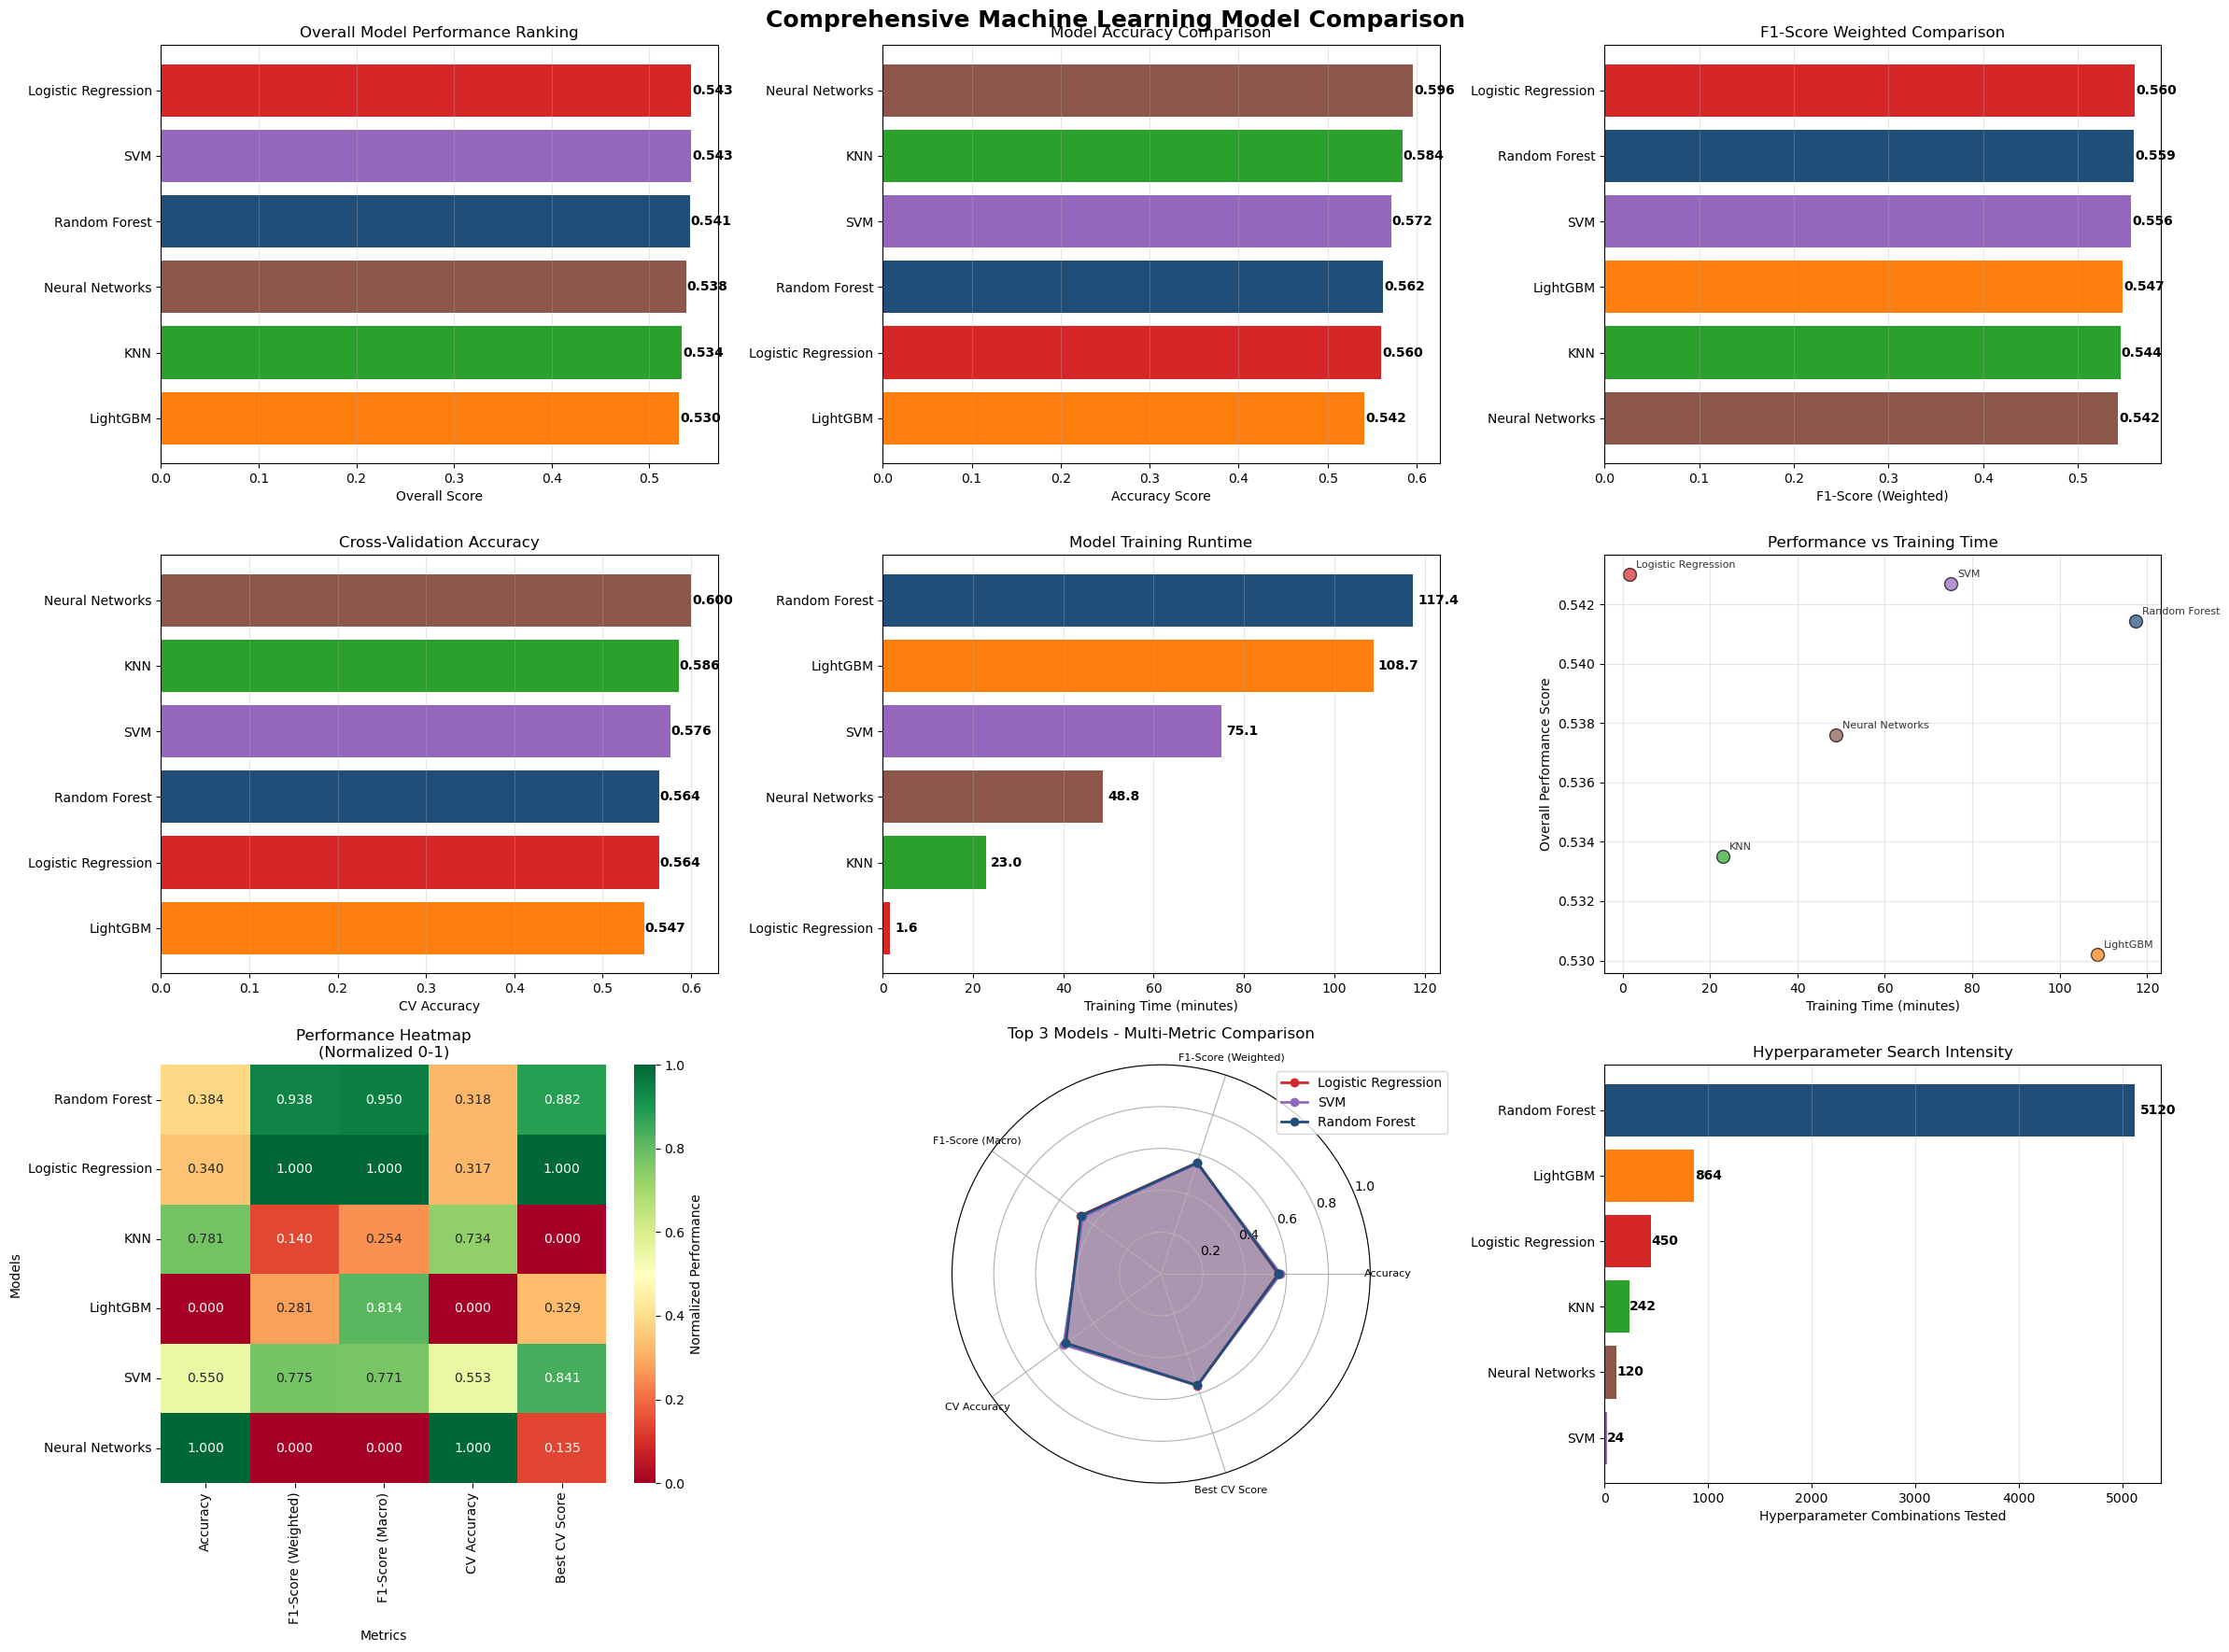

In [4]:
# ================================================================
# 4: Advanced Performance Visualization and Feature Importance
# ================================================================

print("\n📊 CREATING COMPREHENSIVE PERFORMANCE VISUALIZATION")
print("=" * 60)

# Create a comprehensive visualization with multiple subplots
fig, axes = plt.subplots(3, 3, figsize=(24, 18))
fig.suptitle('Comprehensive Machine Learning Model Comparison', fontsize=18, fontweight='bold')

# 1. Overall Performance Bar Chart
ax1 = axes[0, 0]
overall_scores = comparison_df['Overall_Score'].sort_values(ascending=True)
colors = [models_info.get(model, {}).get('color', '#1f4e79') for model in overall_scores.index]
bars1 = ax1.barh(range(len(overall_scores)), overall_scores.values, color=colors)
ax1.set_yticks(range(len(overall_scores)))
ax1.set_yticklabels(overall_scores.index)
ax1.set_xlabel('Overall Score')
ax1.set_title('Overall Model Performance Ranking')
ax1.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars1):
    width = bar.get_width()
    ax1.text(width + 0.001, bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}', ha='left', va='center', fontweight='bold')

# 2. Accuracy Comparison
ax2 = axes[0, 1]
accuracy_scores = comparison_df['Accuracy'].sort_values(ascending=True)
colors = [models_info.get(model, {}).get('color', '#1f4e79') for model in accuracy_scores.index]
bars2 = ax2.barh(range(len(accuracy_scores)), accuracy_scores.values, color=colors)
ax2.set_yticks(range(len(accuracy_scores)))
ax2.set_yticklabels(accuracy_scores.index)
ax2.set_xlabel('Accuracy Score')
ax2.set_title('Model Accuracy Comparison')
ax2.grid(axis='x', alpha=0.3)

# Add value labels
for i, bar in enumerate(bars2):
    width = bar.get_width()
    ax2.text(width + 0.001, bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}', ha='left', va='center', fontweight='bold')

# 3. F1-Score Weighted Comparison
ax3 = axes[0, 2]
f1_scores = comparison_df['F1-Score (Weighted)'].sort_values(ascending=True)
colors = [models_info.get(model, {}).get('color', '#1f4e79') for model in f1_scores.index]
bars3 = ax3.barh(range(len(f1_scores)), f1_scores.values, color=colors)
ax3.set_yticks(range(len(f1_scores)))
ax3.set_yticklabels(f1_scores.index)
ax3.set_xlabel('F1-Score (Weighted)')
ax3.set_title('F1-Score Weighted Comparison')
ax3.grid(axis='x', alpha=0.3)

# Add value labels
for i, bar in enumerate(bars3):
    width = bar.get_width()
    ax3.text(width + 0.001, bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}', ha='left', va='center', fontweight='bold')

# 4. Cross-Validation Stability
ax4 = axes[1, 0]
cv_accuracy = comparison_df['CV Accuracy'].sort_values(ascending=True)
colors = [models_info.get(model, {}).get('color', '#1f4e79') for model in cv_accuracy.index]
bars4 = ax4.barh(range(len(cv_accuracy)), cv_accuracy.values, color=colors)
ax4.set_yticks(range(len(cv_accuracy)))
ax4.set_yticklabels(cv_accuracy.index)
ax4.set_xlabel('CV Accuracy')
ax4.set_title('Cross-Validation Accuracy')
ax4.grid(axis='x', alpha=0.3)

# Add value labels
for i, bar in enumerate(bars4):
    width = bar.get_width()
    ax4.text(width + 0.001, bar.get_y() + bar.get_height()/2, 
             f'{width:.3f}', ha='left', va='center', fontweight='bold')

# 5. Training Runtime Comparison
ax5 = axes[1, 1]
runtime_scores = model_info_df['Runtime (min)'].sort_values(ascending=True)
colors = [models_info.get(model, {}).get('color', '#1f4e79') for model in runtime_scores.index]
bars5 = ax5.barh(range(len(runtime_scores)), runtime_scores.values, color=colors)
ax5.set_yticks(range(len(runtime_scores)))
ax5.set_yticklabels(runtime_scores.index)
ax5.set_xlabel('Training Time (minutes)')
ax5.set_title('Model Training Runtime')
ax5.grid(axis='x', alpha=0.3)

# Add value labels
for i, bar in enumerate(bars5):
    width = bar.get_width()
    ax5.text(width + 1, bar.get_y() + bar.get_height()/2, 
             f'{width:.1f}', ha='left', va='center', fontweight='bold')

# 6. Performance vs Runtime Scatter Plot
ax6 = axes[1, 2]
for model in comparison_df.index:
    if model in model_info_df.index:
        runtime = model_info_df.loc[model, 'Runtime (min)']
        performance = comparison_df.loc[model, 'Overall_Score']
        color = models_info.get(model, {}).get('color', '#1f4e79')
        ax6.scatter(runtime, performance, color=color, s=100, alpha=0.7, edgecolors='black')
        ax6.annotate(model, (runtime, performance), xytext=(5, 5), 
                    textcoords='offset points', fontsize=8, alpha=0.8)

ax6.set_xlabel('Training Time (minutes)')
ax6.set_ylabel('Overall Performance Score')
ax6.set_title('Performance vs Training Time')
ax6.grid(True, alpha=0.3)

# 7. Model Performance Heatmap
ax7 = axes[2, 0]
# Select key metrics for heatmap
heatmap_metrics = ['Accuracy', 'F1-Score (Weighted)', 'F1-Score (Macro)', 'CV Accuracy', 'Best CV Score']
heatmap_data = comparison_df[heatmap_metrics]
heatmap_normalized = (heatmap_data - heatmap_data.min()) / (heatmap_data.max() - heatmap_data.min())

sns.heatmap(heatmap_normalized, annot=True, cmap='RdYlGn', center=0.5, 
            ax=ax7, cbar_kws={'label': 'Normalized Performance'}, fmt='.3f')
ax7.set_title('Performance Heatmap\n(Normalized 0-1)')
ax7.set_xlabel('Metrics')
ax7.set_ylabel('Models')

# 8. Radar Chart for Top 3 Models
ax8 = axes[2, 1]
ax8.remove()  # Remove to create polar subplot
ax8 = fig.add_subplot(3, 3, 8, projection='polar')

# Select top 3 models for radar chart
top_3_models = overall_ranking.head(3).index
metrics_for_radar = ['Accuracy', 'F1-Score (Weighted)', 'F1-Score (Macro)', 'CV Accuracy', 'Best CV Score']

angles = np.linspace(0, 2 * np.pi, len(metrics_for_radar), endpoint=False).tolist()
angles += angles[:1]  # Complete the circle

for i, model in enumerate(top_3_models):
    values = comparison_df.loc[model, metrics_for_radar].tolist()
    values += values[:1]  # Complete the circle
    
    color = models_info.get(model, {}).get('color', '#1f4e79')
    ax8.plot(angles, values, 'o-', linewidth=2, label=model, color=color)
    ax8.fill(angles, values, alpha=0.25, color=color)

ax8.set_xticks(angles[:-1])
ax8.set_xticklabels(metrics_for_radar, fontsize=8)
ax8.set_ylim(0, 1)
ax8.set_title('Top 3 Models - Multi-Metric Comparison', pad=20)
ax8.legend(loc='upper right', bbox_to_anchor=(1.2, 1.0))

# 9. Hyperparameter Search Efficiency
ax9 = axes[2, 2]
combinations_tested = model_info_df['Combinations Tested'].sort_values(ascending=True)
colors = [models_info.get(model, {}).get('color', '#1f4e79') for model in combinations_tested.index]
bars9 = ax9.barh(range(len(combinations_tested)), combinations_tested.values, color=colors)
ax9.set_yticks(range(len(combinations_tested)))
ax9.set_yticklabels(combinations_tested.index)
ax9.set_xlabel('Hyperparameter Combinations Tested')
ax9.set_title('Hyperparameter Search Intensity')
ax9.grid(axis='x', alpha=0.3)

# Add value labels
for i, bar in enumerate(bars9):
    width = bar.get_width()
    ax9.text(width + width*0.01, bar.get_y() + bar.get_height()/2, 
             f'{int(width)}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()


📈 STATISTICAL ANALYSIS AND ADVANCED INSIGHTS
📊 DATASET INFORMATION:
-------------------------
Training Samples: 22,180
Test Samples: 5,545
Number of Features: 20
Number of Classes: 3
Class Distribution:
  Class 0: 4,237 samples (19.1%)
  Class 1: 5,634 samples (25.4%)
  Class 2: 12,309 samples (55.5%)

📊 PERFORMANCE STATISTICS ACROSS ALL 6 MODELS:
                        mean     std     min     max   range
Accuracy              0.5693  0.0192  0.5416  0.5960  0.0544
F1-Score (Weighted)   0.5513  0.0077  0.5420  0.5598  0.0178
F1-Score (Macro)      0.4564  0.0210  0.4239  0.4754  0.0515
Precision (Weighted)  0.5527  0.0091  0.5360  0.5614  0.0254
Recall (Weighted)     0.5728  0.0190  0.5466  0.6003  0.0537
CV Accuracy           0.5728  0.0190  0.5466  0.6003  0.0537
CV F1 (Weighted)      0.5543  0.0073  0.5453  0.5623  0.0170
CV F1 (Macro)         0.4589  0.0197  0.4312  0.4788  0.0476
Best CV Score         0.5543  0.0073  0.5453  0.5623  0.0170

🎯 CROSS-VALIDATION STABILITY ANALYSIS:

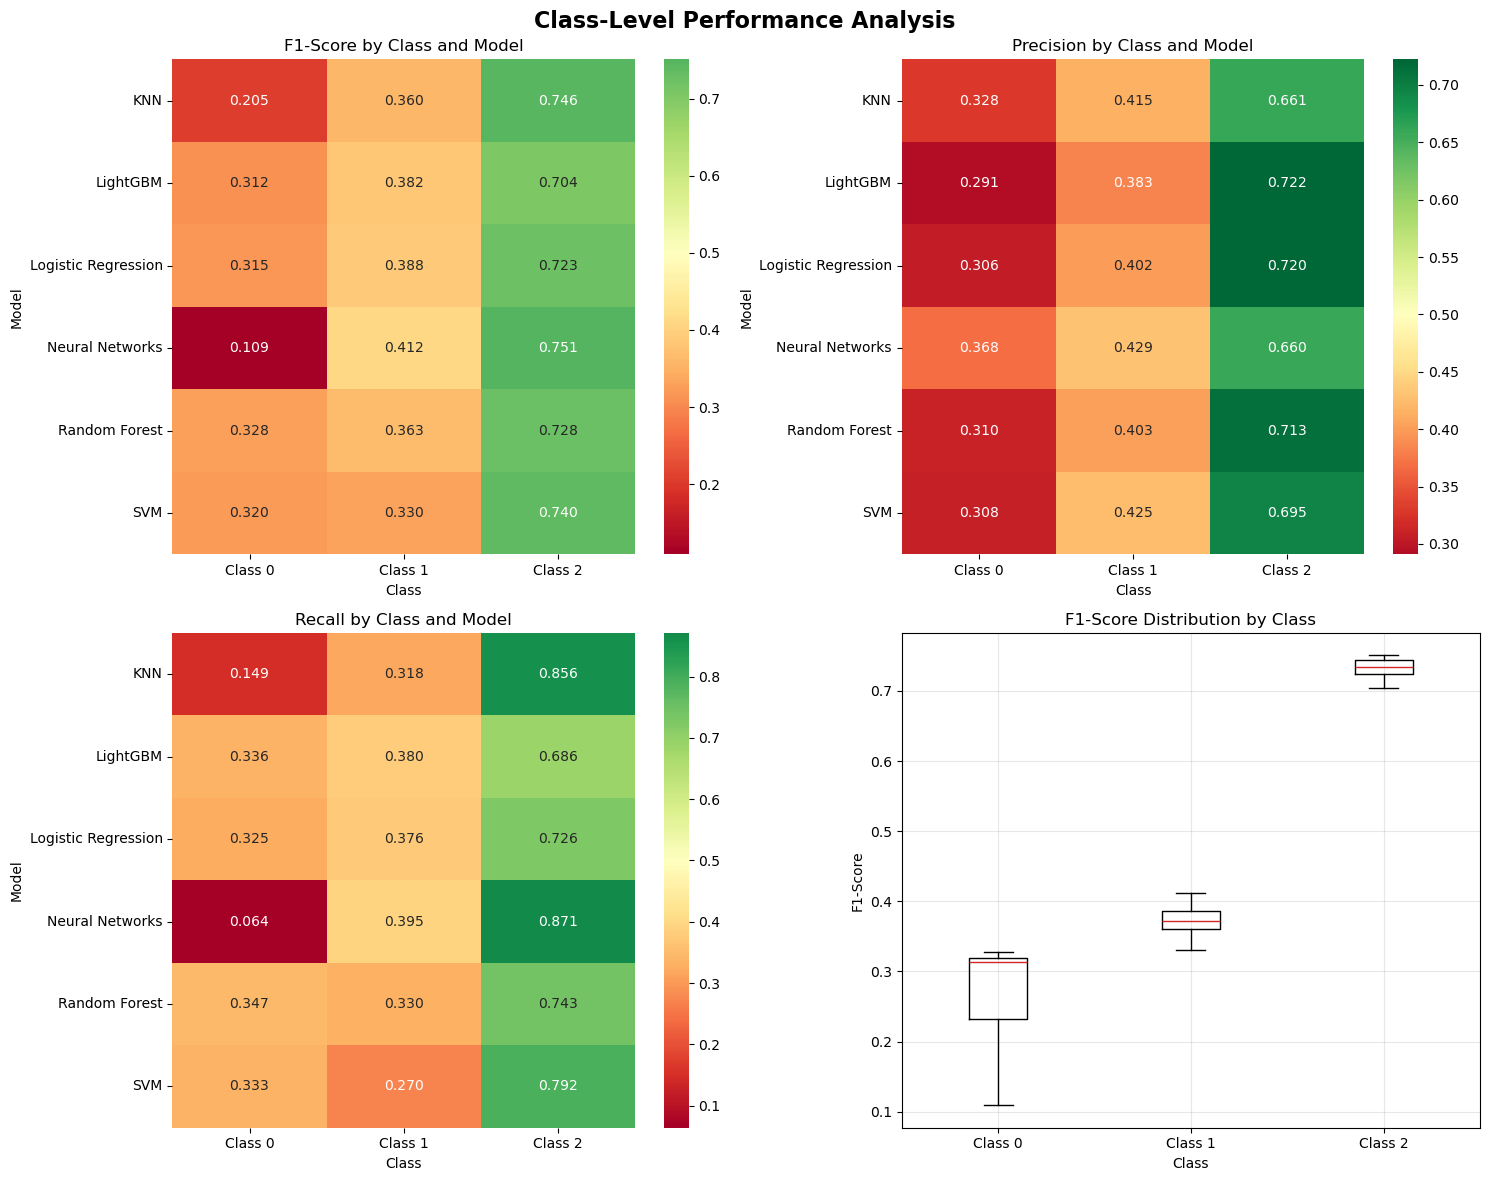


⚖️  CLASS IMBALANCE HANDLING ANALYSIS:
----------------------------------------
Class Distribution:
  Class 0: 19.1% (1,059 samples)
  Class 1: 25.4% (1,410 samples)
  Class 2: 55.5% (3,076 samples)

Minority Class: 0 (19.1%)
Majority Class: 2 (55.5%)

Best Models for Minority Class (0):
  1. Random Forest       : F1=0.3275, Precision=0.3098, Recall=0.3475
  2. SVM                 : F1=0.3203, Precision=0.3083, Recall=0.3333
  3. Logistic Regression : F1=0.3152, Precision=0.3060, Recall=0.3248

Best Models for Majority Class (2):
  1. Neural Networks     : F1=0.7508, Precision=0.6596, Recall=0.8713
  2. KNN                 : F1=0.7459, Precision=0.6609, Recall=0.8560
  3. SVM                 : F1=0.7402, Precision=0.6951, Recall=0.7916

🎯 CLASS BALANCE PERFORMANCE RANKING:
(Higher score = more balanced performance across classes)
  1. LightGBM                 : Balance Score = 2.7279
  2. Logistic Regression      : Balance Score = 2.6794
  3. Random Forest            : Balance Score =

In [5]:
# ================================================================
# 5: Statistical Analysis, Dataset Info, and Advanced Insights
# ================================================================

print("\n📈 STATISTICAL ANALYSIS AND ADVANCED INSIGHTS")
print("=" * 55)

# Extract dataset information (should be consistent across models)
sample_model = list(all_metrics.keys())[0]
dataset_info = all_metrics[sample_model].get('dataset_info', {})

print("📊 DATASET INFORMATION:")
print("-" * 25)
print(f"Training Samples: {dataset_info.get('training_samples', 'Unknown'):,}")
print(f"Test Samples: {dataset_info.get('test_samples', 'Unknown'):,}")
print(f"Number of Features: {dataset_info.get('n_features', 'Unknown')}")
print(f"Number of Classes: {dataset_info.get('n_classes', 'Unknown')}")

if 'class_distribution' in dataset_info:
    print(f"Class Distribution:")
    total_samples = sum(dataset_info['class_distribution'].values())
    for class_id, count in dataset_info['class_distribution'].items():
        percentage = (count / total_samples) * 100
        print(f"  Class {class_id}: {count:,} samples ({percentage:.1f}%)")

# Calculate performance statistics
performance_stats = {
    'mean': comparison_df.drop('Overall_Score', axis=1).mean(),
    'std': comparison_df.drop('Overall_Score', axis=1).std(),
    'min': comparison_df.drop('Overall_Score', axis=1).min(),
    'max': comparison_df.drop('Overall_Score', axis=1).max(),
    'range': comparison_df.drop('Overall_Score', axis=1).max() - comparison_df.drop('Overall_Score', axis=1).min()
}

stats_df = pd.DataFrame(performance_stats).round(4)
print(f"\n📊 PERFORMANCE STATISTICS ACROSS ALL {len(comparison_df)} MODELS:")
print(stats_df)

# Cross-validation stability analysis
print(f"\n🎯 CROSS-VALIDATION STABILITY ANALYSIS:")
print("-" * 40)

cv_stability = {}
for model_name, metrics in all_metrics.items():
    cv_results = metrics.get('cross_validation_results', {})
    cv_scores = cv_results.get('cv_scores_by_metric', {})
    
    stability_scores = {}
    for metric_name, metric_data in cv_scores.items():
        if isinstance(metric_data, dict) and 'std' in metric_data:
            # Lower std means more stable
            stability_scores[metric_name] = metric_data['std']
    
    if stability_scores:
        avg_stability = np.mean(list(stability_scores.values()))
        cv_stability[model_name] = {
            'avg_cv_std': avg_stability,
            'detailed_std': stability_scores
        }

# Sort by stability (lower std = more stable)
stable_models = sorted(cv_stability.items(), key=lambda x: x[1]['avg_cv_std'])

print("Model Stability Ranking (Lower Std Dev = More Stable):")
for i, (model, stability_data) in enumerate(stable_models, 1):
    print(f"{i}. {model:25s}: Avg CV Std = {stability_data['avg_cv_std']:.4f}")

# Hyperparameter search efficiency analysis
print(f"\n🔍 HYPERPARAMETER OPTIMIZATION ANALYSIS:")
print("-" * 45)

# Calculate efficiency: performance gain per combination tested
efficiency_analysis = {}
for model in comparison_df.index:
    if model in model_info_df.index:
        combinations = model_info_df.loc[model, 'Combinations Tested']
        performance = comparison_df.loc[model, 'Overall_Score']
        runtime = model_info_df.loc[model, 'Runtime (min)']
        
        # Calculate different efficiency metrics
        efficiency_analysis[model] = {
            'performance_per_combination': performance / max(combinations, 1),
            'performance_per_minute': performance / max(runtime, 0.001),
            'combinations_per_minute': combinations / max(runtime, 0.001)
        }

print("Hyperparameter Search Efficiency:")
print("Model                    Perf/Combo   Perf/Min   Combo/Min")
print("-" * 60)
for model, metrics in efficiency_analysis.items():
    print(f"{model:25s}: {metrics['performance_per_combination']:8.6f}   "
          f"{metrics['performance_per_minute']:7.4f}   {metrics['combinations_per_minute']:8.1f}")

# Identify standout performers and patterns
print(f"\n🌟 KEY INSIGHTS AND PATTERNS:")
print("-" * 35)

# Best overall performer
best_overall = overall_ranking.index[0]
best_score = overall_ranking.iloc[0]
print(f"🥇 Best Overall Model: {best_overall}")
print(f"   Overall Score: {best_score:.4f}")
print(f"   Training Time: {model_info_df.loc[best_overall, 'Runtime (min)']:.1f} minutes")
print(f"   Algorithm: {model_info_df.loc[best_overall, 'Algorithm']}")

# Most stable performer
if stable_models:
    most_stable = stable_models[0][0]
    stability_score = stable_models[0][1]['avg_cv_std']
    print(f"\n🎯 Most Stable Model: {most_stable}")
    print(f"   Average CV Std Dev: {stability_score:.4f}")
    print(f"   Overall Performance: {comparison_df.loc[most_stable, 'Overall_Score']:.4f}")

# Fastest training
fastest_model = model_info_df['Runtime (min)'].idxmin()
fastest_time = model_info_df.loc[fastest_model, 'Runtime (min)']
print(f"\n⚡ Fastest Training: {fastest_model}")
print(f"   Training Time: {fastest_time:.1f} minutes")
print(f"   Performance: {comparison_df.loc[fastest_model, 'Overall_Score']:.4f}")

# Best performance-to-time ratio
best_efficiency = max(efficiency_analysis.items(), key=lambda x: x[1]['performance_per_minute'])
print(f"\n🏃 Most Time-Efficient: {best_efficiency[0]}")
print(f"   Performance per Minute: {best_efficiency[1]['performance_per_minute']:.4f}")

# Performance gaps analysis
print(f"\n📏 PERFORMANCE GAPS ANALYSIS:")
print("-" * 35)
for metric in ['Accuracy', 'F1-Score (Weighted)', 'F1-Score (Macro)']:
    metric_range = comparison_df[metric].max() - comparison_df[metric].min()
    best_model = comparison_df[metric].idxmax()
    worst_model = comparison_df[metric].idxmin()
    print(f"{metric}:")
    print(f"  Range: {metric_range:.4f} ({best_model} vs {worst_model})")
    print(f"  Best: {comparison_df.loc[best_model, metric]:.4f}")
    print(f"  Worst: {comparison_df.loc[worst_model, metric]:.4f}")

# Model strengths and weaknesses summary
print(f"\n💪 MODEL STRENGTHS & WEAKNESSES SUMMARY:")
print("-" * 45)

for model in comparison_df.index:
    print(f"\n🔹 {model.upper()}:")
    
    # Find strengths (top 2 metrics for this model)
    model_ranks = {}
    for metric in ['Accuracy', 'F1-Score (Weighted)', 'F1-Score (Macro)', 'CV Accuracy']:
        model_ranks[metric] = comparison_df[metric].rank(ascending=False)[model]
    
    # Sort by rank (1 is best)
    sorted_metrics = sorted(model_ranks.items(), key=lambda x: x[1])
    
    print(f"   Strengths: {sorted_metrics[0][0]} (Rank #{int(sorted_metrics[0][1])}), "
          f"{sorted_metrics[1][0]} (Rank #{int(sorted_metrics[1][1])})")
    print(f"   Weaknesses: {sorted_metrics[-1][0]} (Rank #{int(sorted_metrics[-1][1])})")
    
    # Additional info
    if model in model_info_df.index:
        runtime = model_info_df.loc[model, 'Runtime (min)']
        combinations = model_info_df.loc[model, 'Combinations Tested']
        print(f"   Training: {runtime:.1f} min, {combinations:,} combinations tested")
    
    # Stability info
    if model in cv_stability:
        avg_std = cv_stability[model]['avg_cv_std']
        stability_rank = [m[0] for m in stable_models].index(model) + 1
        print(f"   Stability: Rank #{stability_rank} (CV Std: {avg_std:.4f})")

# Algorithm family analysis
print(f"\n🧬 ALGORITHM FAMILY PERFORMANCE:")
print("-" * 35)

algorithm_families = {
    'Ensemble': ['Random Forest', 'LightGBM'],
    'Linear': ['Logistic Regression', 'SVM'],
    'Instance-based': ['KNN'],
    'Neural': ['Neural Networks']
}

family_performance = {}
for family, models in algorithm_families.items():
    family_models = [m for m in models if m in comparison_df.index]
    if family_models:
        avg_performance = comparison_df.loc[family_models, 'Overall_Score'].mean()
        best_in_family = comparison_df.loc[family_models, 'Overall_Score'].idxmax()
        family_performance[family] = {
            'avg_score': avg_performance,
            'best_model': best_in_family,
            'model_count': len(family_models)
        }

for family, data in sorted(family_performance.items(), key=lambda x: x[1]['avg_score'], reverse=True):
    print(f"{family:15s}: Avg Score = {data['avg_score']:.4f}, "
          f"Best = {data['best_model']} ({data['model_count']} model{'s' if data['model_count'] > 1 else ''})")

# ================================================================
# CLASS-LEVEL PERFORMANCE ANALYSIS
# ================================================================

if all_classification_reports and class_labels:
    print(f"\n🎯 DETAILED CLASS-LEVEL PERFORMANCE ANALYSIS")
    print("=" * 55)
    
    # Create class-level performance comparison
    class_performance_data = []
    
    for model_name, class_report in all_classification_reports.items():
        for class_id in class_labels:
            if class_id in class_report:
                class_info = class_report[class_id]
                class_performance_data.append({
                    'Model': model_name,
                    'Class': f'Class {class_id}',
                    'Precision': class_info['precision'],
                    'Recall': class_info['recall'],
                    'F1-Score': class_info['f1-score'],
                    'Support': class_info['support']
                })
    
    class_performance_df = pd.DataFrame(class_performance_data)
    
    # Display class performance summary
    print("📊 CLASS-WISE PERFORMANCE SUMMARY:")
    print("-" * 35)
    
    for class_id in class_labels:
        class_data = class_performance_df[class_performance_df['Class'] == f'Class {class_id}']
        print(f"\n🔸 CLASS {class_id} PERFORMANCE:")
        
        # Best performers for this class
        best_precision = class_data.loc[class_data['Precision'].idxmax()]
        best_recall = class_data.loc[class_data['Recall'].idxmax()]
        best_f1 = class_data.loc[class_data['F1-Score'].idxmax()]
        
        print(f"   Best Precision: {best_precision['Model']:20s} ({best_precision['Precision']:.4f})")
        print(f"   Best Recall:    {best_recall['Model']:20s} ({best_recall['Recall']:.4f})")
        print(f"   Best F1-Score:  {best_f1['Model']:20s} ({best_f1['F1-Score']:.4f})")
        
        # Class difficulty analysis
        avg_f1 = class_data['F1-Score'].mean()
        std_f1 = class_data['F1-Score'].std()
        support = class_data['Support'].iloc[0]  # Should be same for all models
        
        print(f"   Avg F1 across models: {avg_f1:.4f} (±{std_f1:.4f})")
        print(f"   Sample support: {int(support):,}")
        
        # Difficulty assessment
        if avg_f1 < 0.4:
            difficulty = "Very Difficult"
        elif avg_f1 < 0.6:
            difficulty = "Moderate"
        else:
            difficulty = "Easy"
        print(f"   Classification Difficulty: {difficulty}")
    
    # Create class performance visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Class-Level Performance Analysis', fontsize=16, fontweight='bold')
    
    # 1. F1-Score by Class and Model
    ax1 = axes[0, 0]
    class_pivot = class_performance_df.pivot(index='Model', columns='Class', values='F1-Score')
    sns.heatmap(class_pivot, annot=True, cmap='RdYlGn', center=0.5, ax=ax1, fmt='.3f')
    ax1.set_title('F1-Score by Class and Model')
    ax1.set_xlabel('Class')
    ax1.set_ylabel('Model')
    
    # 2. Precision by Class and Model
    ax2 = axes[0, 1]
    precision_pivot = class_performance_df.pivot(index='Model', columns='Class', values='Precision')
    sns.heatmap(precision_pivot, annot=True, cmap='RdYlGn', center=0.5, ax=ax2, fmt='.3f')
    ax2.set_title('Precision by Class and Model')
    ax2.set_xlabel('Class')
    ax2.set_ylabel('Model')
    
    # 3. Recall by Class and Model
    ax3 = axes[1, 0]
    recall_pivot = class_performance_df.pivot(index='Model', columns='Class', values='Recall')
    sns.heatmap(recall_pivot, annot=True, cmap='RdYlGn', center=0.5, ax=ax3, fmt='.3f')
    ax3.set_title('Recall by Class and Model')
    ax3.set_xlabel('Class')
    ax3.set_ylabel('Model')
    
    # 4. Class Performance Distribution
    ax4 = axes[1, 1]
    
    # Box plot showing F1-score distribution across models for each class
    class_f1_data = []
    class_names = []
    for class_id in class_labels:
        class_data = class_performance_df[class_performance_df['Class'] == f'Class {class_id}']
        class_f1_data.append(class_data['F1-Score'].values)
        class_names.append(f'Class {class_id}')
    
    ax4.boxplot(class_f1_data, labels=class_names)
    ax4.set_title('F1-Score Distribution by Class')
    ax4.set_xlabel('Class')
    ax4.set_ylabel('F1-Score')
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Class imbalance handling analysis
    print(f"\n⚖️  CLASS IMBALANCE HANDLING ANALYSIS:")
    print("-" * 40)
    
    # Calculate class imbalance ratio
    class_supports = {}
    for class_id in class_labels:
        class_data = class_performance_df[class_performance_df['Class'] == f'Class {class_id}']
        class_supports[class_id] = int(class_data['Support'].iloc[0])
    
    total_support = sum(class_supports.values())
    class_ratios = {k: v/total_support for k, v in class_supports.items()}
    
    print("Class Distribution:")
    for class_id, ratio in class_ratios.items():
        print(f"  Class {class_id}: {ratio:.1%} ({class_supports[class_id]:,} samples)")
    
    # Identify minority and majority classes
    minority_class = min(class_ratios, key=class_ratios.get)
    majority_class = max(class_ratios, key=class_ratios.get)
    
    print(f"\nMinority Class: {minority_class} ({class_ratios[minority_class]:.1%})")
    print(f"Majority Class: {majority_class} ({class_ratios[majority_class]:.1%})")
    
    # Analyze which models handle imbalance better
    minority_performance = class_performance_df[class_performance_df['Class'] == f'Class {minority_class}'].sort_values('F1-Score', ascending=False)
    majority_performance = class_performance_df[class_performance_df['Class'] == f'Class {majority_class}'].sort_values('F1-Score', ascending=False)
    
    print(f"\nBest Models for Minority Class ({minority_class}):")
    for i, (_, row) in enumerate(minority_performance.head(3).iterrows(), 1):
        print(f"  {i}. {row['Model']:20s}: F1={row['F1-Score']:.4f}, Precision={row['Precision']:.4f}, Recall={row['Recall']:.4f}")
    
    print(f"\nBest Models for Majority Class ({majority_class}):")
    for i, (_, row) in enumerate(majority_performance.head(3).iterrows(), 1):
        print(f"  {i}. {row['Model']:20s}: F1={row['F1-Score']:.4f}, Precision={row['Precision']:.4f}, Recall={row['Recall']:.4f}")
    
    # Calculate balance score (how well model performs across all classes)
    balance_scores = {}
    for model in class_performance_df['Model'].unique():
        model_data = class_performance_df[class_performance_df['Model'] == model]
        f1_scores = model_data['F1-Score'].values
        # Balance score: inverse of coefficient of variation (lower CV = better balance)
        balance_score = np.mean(f1_scores) / (np.std(f1_scores) + 0.0001)
        balance_scores[model] = balance_score
    
    print(f"\n🎯 CLASS BALANCE PERFORMANCE RANKING:")
    print("(Higher score = more balanced performance across classes)")
    for i, (model, score) in enumerate(sorted(balance_scores.items(), key=lambda x: x[1], reverse=True), 1):
        print(f"  {i}. {model:25s}: Balance Score = {score:.4f}")

else:
    print(f"\n⚠️  Classification reports not available for detailed class analysis")

In [6]:
# ================================================================
# 5. Statistical Analysis, Dataset Info, and Advanced Insights
# ================================================================

print("\n📈 STATISTICAL ANALYSIS AND ADVANCED INSIGHTS")
print("=" * 55)

# Extract dataset information (should be consistent across models)
sample_model = list(all_metrics.keys())[0]
dataset_info = all_metrics[sample_model].get('dataset_info', {})

print("📊 DATASET INFORMATION:")
print("-" * 25)
print(f"Training Samples: {dataset_info.get('training_samples', 'Unknown'):,}")
print(f"Test Samples: {dataset_info.get('test_samples', 'Unknown'):,}")
print(f"Number of Features: {dataset_info.get('n_features', 'Unknown')}")
print(f"Number of Classes: {dataset_info.get('n_classes', 'Unknown')}")

if 'class_distribution' in dataset_info:
    print(f"Class Distribution:")
    total_samples = sum(dataset_info['class_distribution'].values())
    class_labels_map = {0: '0-Withdrawn', 1: '1-Fail', 2: '2-Pass'}
    for class_id, count in dataset_info['class_distribution'].items():
        percentage = (count / total_samples) * 100
        class_label = class_labels_map.get(int(class_id), f"Class {class_id}")
        print(f"  {class_label}: {count:,} samples ({percentage:.1f}%)")

# Calculate performance statistics
performance_stats = {
    'mean': comparison_df.drop('Overall_Score', axis=1).mean(),
    'std': comparison_df.drop('Overall_Score', axis=1).std(),
    'min': comparison_df.drop('Overall_Score', axis=1).min(),
    'max': comparison_df.drop('Overall_Score', axis=1).max(),
    'range': comparison_df.drop('Overall_Score', axis=1).max() - comparison_df.drop('Overall_Score', axis=1).min()
}

stats_df = pd.DataFrame(performance_stats).round(4)
print(f"\n📊 PERFORMANCE STATISTICS ACROSS ALL {len(comparison_df)} MODELS:")
print(stats_df)

# Cross-validation stability analysis
print(f"\n🎯 CROSS-VALIDATION STABILITY ANALYSIS:")
print("-" * 40)

cv_stability = {}
for model_name, metrics in all_metrics.items():
    cv_results = metrics.get('cross_validation_results', {})
    cv_scores = cv_results.get('cv_scores_by_metric', {})
    
    stability_scores = {}
    for metric_name, metric_data in cv_scores.items():
        if isinstance(metric_data, dict) and 'std' in metric_data:
            # Lower std means more stable
            stability_scores[metric_name] = metric_data['std']
    
    if stability_scores:
        avg_stability = np.mean(list(stability_scores.values()))
        cv_stability[model_name] = {
            'avg_cv_std': avg_stability,
            'detailed_std': stability_scores
        }

# Sort by stability (lower std = more stable)
stable_models = sorted(cv_stability.items(), key=lambda x: x[1]['avg_cv_std'])

print("Model Stability Ranking (Lower Std Dev = More Stable):")
for i, (model, stability_data) in enumerate(stable_models, 1):
    print(f"{i}. {model:25s}: Avg CV Std = {stability_data['avg_cv_std']:.4f}")

# Hyperparameter search efficiency analysis
print(f"\n🔍 HYPERPARAMETER OPTIMIZATION ANALYSIS:")
print("-" * 45)

# Calculate efficiency: performance gain per combination tested
efficiency_analysis = {}
for model in comparison_df.index:
    if model in model_info_df.index:
        combinations = model_info_df.loc[model, 'Combinations Tested']
        performance = comparison_df.loc[model, 'Overall_Score']
        runtime = model_info_df.loc[model, 'Runtime (min)']
        
        # Calculate different efficiency metrics
        efficiency_analysis[model] = {
            'performance_per_combination': performance / max(combinations, 1),
            'performance_per_minute': performance / max(runtime, 0.001),
            'combinations_per_minute': combinations / max(runtime, 0.001)
        }

print("Hyperparameter Search Efficiency:")
print("Model                    Perf/Combo   Perf/Min   Combo/Min")
print("-" * 60)
for model, metrics in efficiency_analysis.items():
    print(f"{model:25s}: {metrics['performance_per_combination']:8.6f}   "
          f"{metrics['performance_per_minute']:7.4f}   {metrics['combinations_per_minute']:8.1f}")

# Identify standout performers and patterns
print(f"\n🌟 KEY INSIGHTS AND PATTERNS:")
print("-" * 35)

# Best overall performer
best_overall = overall_ranking.index[0]
best_score = overall_ranking.iloc[0]
print(f"🥇 Best Overall Model: {best_overall}")
print(f"   Overall Score: {best_score:.4f}")
print(f"   Training Time: {model_info_df.loc[best_overall, 'Runtime (min)']:.1f} minutes")
print(f"   Algorithm: {model_info_df.loc[best_overall, 'Algorithm']}")

# Most stable performer
if stable_models:
    most_stable = stable_models[0][0]
    stability_score = stable_models[0][1]['avg_cv_std']
    print(f"\n🎯 Most Stable Model: {most_stable}")
    print(f"   Average CV Std Dev: {stability_score:.4f}")
    print(f"   Overall Performance: {comparison_df.loc[most_stable, 'Overall_Score']:.4f}")

# Fastest training
fastest_model = model_info_df['Runtime (min)'].idxmin()
fastest_time = model_info_df.loc[fastest_model, 'Runtime (min)']
print(f"\n⚡ Fastest Training: {fastest_model}")
print(f"   Training Time: {fastest_time:.1f} minutes")
print(f"   Performance: {comparison_df.loc[fastest_model, 'Overall_Score']:.4f}")

# Best performance-to-time ratio
best_efficiency = max(efficiency_analysis.items(), key=lambda x: x[1]['performance_per_minute'])
print(f"\n🏃 Most Time-Efficient: {best_efficiency[0]}")
print(f"   Performance per Minute: {best_efficiency[1]['performance_per_minute']:.4f}")

# Performance gaps analysis
print(f"\n📏 PERFORMANCE GAPS ANALYSIS:")
print("-" * 35)
for metric in ['Accuracy', 'F1-Score (Weighted)', 'F1-Score (Macro)']:
    metric_range = comparison_df[metric].max() - comparison_df[metric].min()
    best_model = comparison_df[metric].idxmax()
    worst_model = comparison_df[metric].idxmin()
    print(f"{metric}:")
    print(f"  Range: {metric_range:.4f} ({best_model} vs {worst_model})")
    print(f"  Best: {comparison_df.loc[best_model, metric]:.4f}")
    print(f"  Worst: {comparison_df.loc[worst_model, metric]:.4f}")

# Model strengths and weaknesses summary
print(f"\n💪 MODEL STRENGTHS & WEAKNESSES SUMMARY:")
print("-" * 45)

for model in comparison_df.index:
    print(f"\n🔹 {model.upper()}:")
    
    # Find strengths (top 2 metrics for this model)
    model_ranks = {}
    for metric in ['Accuracy', 'F1-Score (Weighted)', 'F1-Score (Macro)', 'CV Accuracy']:
        model_ranks[metric] = comparison_df[metric].rank(ascending=False)[model]
    
    # Sort by rank (1 is best)
    sorted_metrics = sorted(model_ranks.items(), key=lambda x: x[1])
    
    print(f"   Strengths: {sorted_metrics[0][0]} (Rank #{int(sorted_metrics[0][1])}), "
          f"{sorted_metrics[1][0]} (Rank #{int(sorted_metrics[1][1])})")
    print(f"   Weaknesses: {sorted_metrics[-1][0]} (Rank #{int(sorted_metrics[-1][1])})")
    
    # Additional info
    if model in model_info_df.index:
        runtime = model_info_df.loc[model, 'Runtime (min)']
        combinations = model_info_df.loc[model, 'Combinations Tested']
        print(f"   Training: {runtime:.1f} min, {combinations:,} combinations tested")
    
    # Stability info
    if model in cv_stability:
        avg_std = cv_stability[model]['avg_cv_std']
        stability_rank = [m[0] for m in stable_models].index(model) + 1
        print(f"   Stability: Rank #{stability_rank} (CV Std: {avg_std:.4f})")

# Algorithm family analysis
print(f"\n🧬 ALGORITHM FAMILY PERFORMANCE:")
print("-" * 35)

algorithm_families = {
    'Ensemble': ['Random Forest', 'LightGBM'],
    'Linear': ['Logistic Regression', 'SVM'],
    'Instance-based': ['KNN'],
    'Neural': ['Neural Networks']
}

family_performance = {}
for family, models in algorithm_families.items():
    family_models = [m for m in models if m in comparison_df.index]
    if family_models:
        avg_performance = comparison_df.loc[family_models, 'Overall_Score'].mean()
        best_in_family = comparison_df.loc[family_models, 'Overall_Score'].idxmax()
        family_performance[family] = {
            'avg_score': avg_performance,
            'best_model': best_in_family,
            'model_count': len(family_models)
        }

for family, data in sorted(family_performance.items(), key=lambda x: x[1]['avg_score'], reverse=True):
    print(f"{family:15s}: Avg Score = {data['avg_score']:.4f}, "
          f"Best = {data['best_model']} ({data['model_count']} model{'s' if data['model_count'] > 1 else ''})")

# ================================================================
# CLASS-LEVEL PERFORMANCE ANALYSIS (Statistics Only)
# ================================================================

if all_classification_reports and class_labels:
    print(f"\n🎯 DETAILED CLASS-LEVEL PERFORMANCE ANALYSIS")
    print("=" * 55)
    
    # Create class-level performance comparison
    class_performance_data = []
    class_labels_map = {0: '0-Withdrawn', 1: '1-Fail', 2: '2-Pass'}
    
    for model_name, class_report in all_classification_reports.items():
        for class_id in class_labels:
            if class_id in class_report:
                class_info = class_report[class_id]
                class_label = class_labels_map.get(int(class_id), f"Class {class_id}")
                class_performance_data.append({
                    'Model': model_name,
                    'Class': class_label,
                    'Precision': class_info['precision'],
                    'Recall': class_info['recall'],
                    'F1-Score': class_info['f1-score'],
                    'Support': class_info['support']
                })
    
    class_performance_df = pd.DataFrame(class_performance_data)
    
    # Display class performance summary
    print("📊 CLASS-WISE PERFORMANCE SUMMARY:")
    print("-" * 35)
    
    for class_id in class_labels:
        class_label = class_labels_map.get(int(class_id), f"Class {class_id}")
        class_data = class_performance_df[class_performance_df['Class'] == class_label]
        print(f"\n🔸 {class_label.upper()} PERFORMANCE:")
        
        # Best performers for this class
        best_precision = class_data.loc[class_data['Precision'].idxmax()]
        best_recall = class_data.loc[class_data['Recall'].idxmax()]
        best_f1 = class_data.loc[class_data['F1-Score'].idxmax()]
        
        print(f"   Best Precision: {best_precision['Model']:20s} ({best_precision['Precision']:.4f})")
        print(f"   Best Recall:    {best_recall['Model']:20s} ({best_recall['Recall']:.4f})")
        print(f"   Best F1-Score:  {best_f1['Model']:20s} ({best_f1['F1-Score']:.4f})")
        
        # Class difficulty analysis
        avg_f1 = class_data['F1-Score'].mean()
        std_f1 = class_data['F1-Score'].std()
        support = class_data['Support'].iloc[0]  # Should be same for all models
        
        print(f"   Avg F1 across models: {avg_f1:.4f} (±{std_f1:.4f})")
        print(f"   Sample support: {int(support):,}")
        
        # Difficulty assessment
        if avg_f1 < 0.4:
            difficulty = "Very Difficult"
        elif avg_f1 < 0.6:
            difficulty = "Moderate"
        else:
            difficulty = "Easy"
        print(f"   Classification Difficulty: {difficulty}")
    
    # Class imbalance handling analysis
    print(f"\n⚖️  CLASS IMBALANCE HANDLING ANALYSIS:")
    print("-" * 40)
    
    # Calculate class imbalance ratio
    class_supports = {}
    for class_id in class_labels:
        class_label = class_labels_map.get(int(class_id), f"Class {class_id}")
        class_data = class_performance_df[class_performance_df['Class'] == class_label]
        class_supports[class_label] = int(class_data['Support'].iloc[0])
    
    total_support = sum(class_supports.values())
    class_ratios = {k: v/total_support for k, v in class_supports.items()}
    
    print("Class Distribution:")
    for class_label, ratio in class_ratios.items():
        print(f"  {class_label}: {ratio:.1%} ({class_supports[class_label]:,} samples)")
    
    # Identify minority and majority classes
    minority_class = min(class_ratios, key=class_ratios.get)
    majority_class = max(class_ratios, key=class_ratios.get)
    
    print(f"\nMinority Class: {minority_class} ({class_ratios[minority_class]:.1%})")
    print(f"Majority Class: {majority_class} ({class_ratios[majority_class]:.1%})")
    
    # Analyze which models handle imbalance better
    minority_performance = class_performance_df[class_performance_df['Class'] == minority_class].sort_values('F1-Score', ascending=False)
    majority_performance = class_performance_df[class_performance_df['Class'] == majority_class].sort_values('F1-Score', ascending=False)
    
    print(f"\nBest Models for Minority Class ({minority_class}):")
    for i, (_, row) in enumerate(minority_performance.head(3).iterrows(), 1):
        print(f"  {i}. {row['Model']:20s}: F1={row['F1-Score']:.4f}, Precision={row['Precision']:.4f}, Recall={row['Recall']:.4f}")
    
    print(f"\nBest Models for Majority Class ({majority_class}):")
    for i, (_, row) in enumerate(majority_performance.head(3).iterrows(), 1):
        print(f"  {i}. {row['Model']:20s}: F1={row['F1-Score']:.4f}, Precision={row['Precision']:.4f}, Recall={row['Recall']:.4f}")
    
    # Calculate balance score (how well model performs across all classes)
    balance_scores = {}
    for model in class_performance_df['Model'].unique():
        model_data = class_performance_df[class_performance_df['Model'] == model]
        f1_scores = model_data['F1-Score'].values
        # Balance score: inverse of coefficient of variation (lower CV = better balance)
        balance_score = np.mean(f1_scores) / (np.std(f1_scores) + 0.0001)
        balance_scores[model] = balance_score
    
    print(f"\n🎯 CLASS BALANCE PERFORMANCE RANKING:")
    print("(Higher score = more balanced performance across classes)")
    for i, (model, score) in enumerate(sorted(balance_scores.items(), key=lambda x: x[1], reverse=True), 1):
        print(f"  {i}. {model:25s}: Balance Score = {score:.4f}")

else:
    print(f"\n⚠️  Classification reports not available for detailed class analysis")


📈 STATISTICAL ANALYSIS AND ADVANCED INSIGHTS
📊 DATASET INFORMATION:
-------------------------
Training Samples: 22,180
Test Samples: 5,545
Number of Features: 20
Number of Classes: 3
Class Distribution:
  0-Withdrawn: 4,237 samples (19.1%)
  1-Fail: 5,634 samples (25.4%)
  2-Pass: 12,309 samples (55.5%)

📊 PERFORMANCE STATISTICS ACROSS ALL 6 MODELS:
                        mean     std     min     max   range
Accuracy              0.5693  0.0192  0.5416  0.5960  0.0544
F1-Score (Weighted)   0.5513  0.0077  0.5420  0.5598  0.0178
F1-Score (Macro)      0.4564  0.0210  0.4239  0.4754  0.0515
Precision (Weighted)  0.5527  0.0091  0.5360  0.5614  0.0254
Recall (Weighted)     0.5728  0.0190  0.5466  0.6003  0.0537
CV Accuracy           0.5728  0.0190  0.5466  0.6003  0.0537
CV F1 (Weighted)      0.5543  0.0073  0.5453  0.5623  0.0170
CV F1 (Macro)         0.4589  0.0197  0.4312  0.4788  0.0476
Best CV Score         0.5543  0.0073  0.5453  0.5623  0.0170

🎯 CROSS-VALIDATION STABILITY ANALYSI


📊 CREATING CLASS-LEVEL PERFORMANCE VISUALIZATIONS


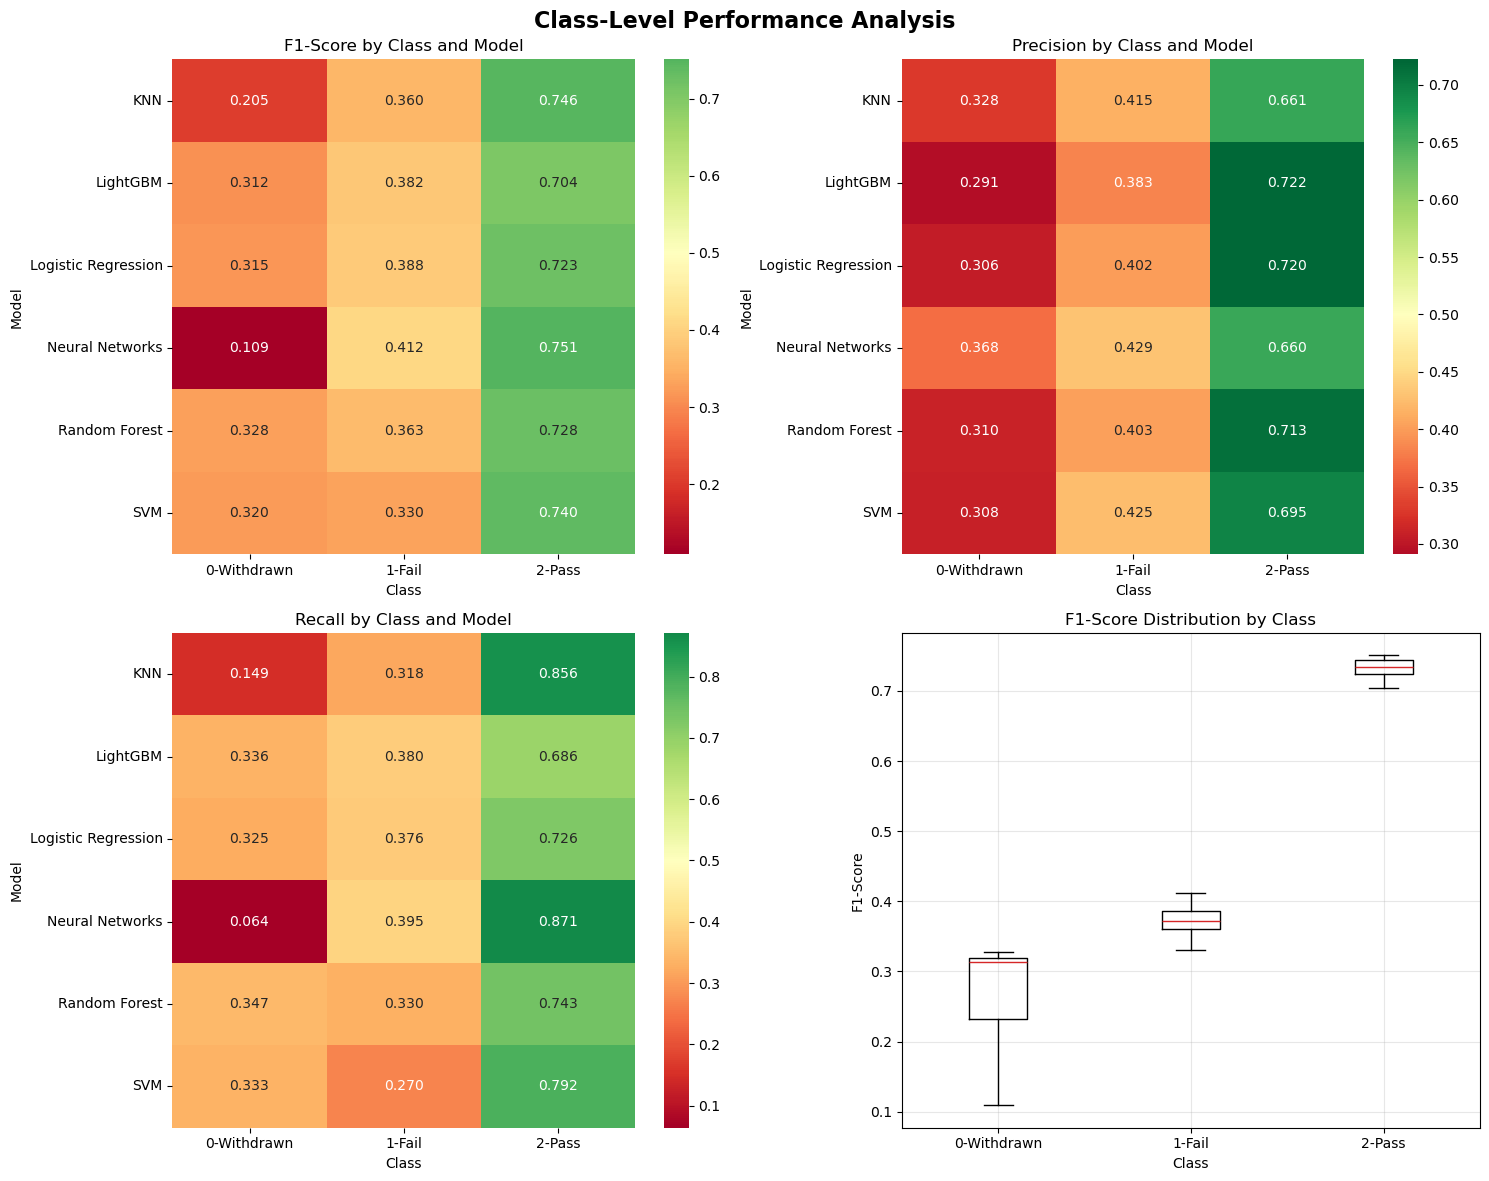


🎯 CREATING CONFUSION MATRICES FOR ALL MODELS


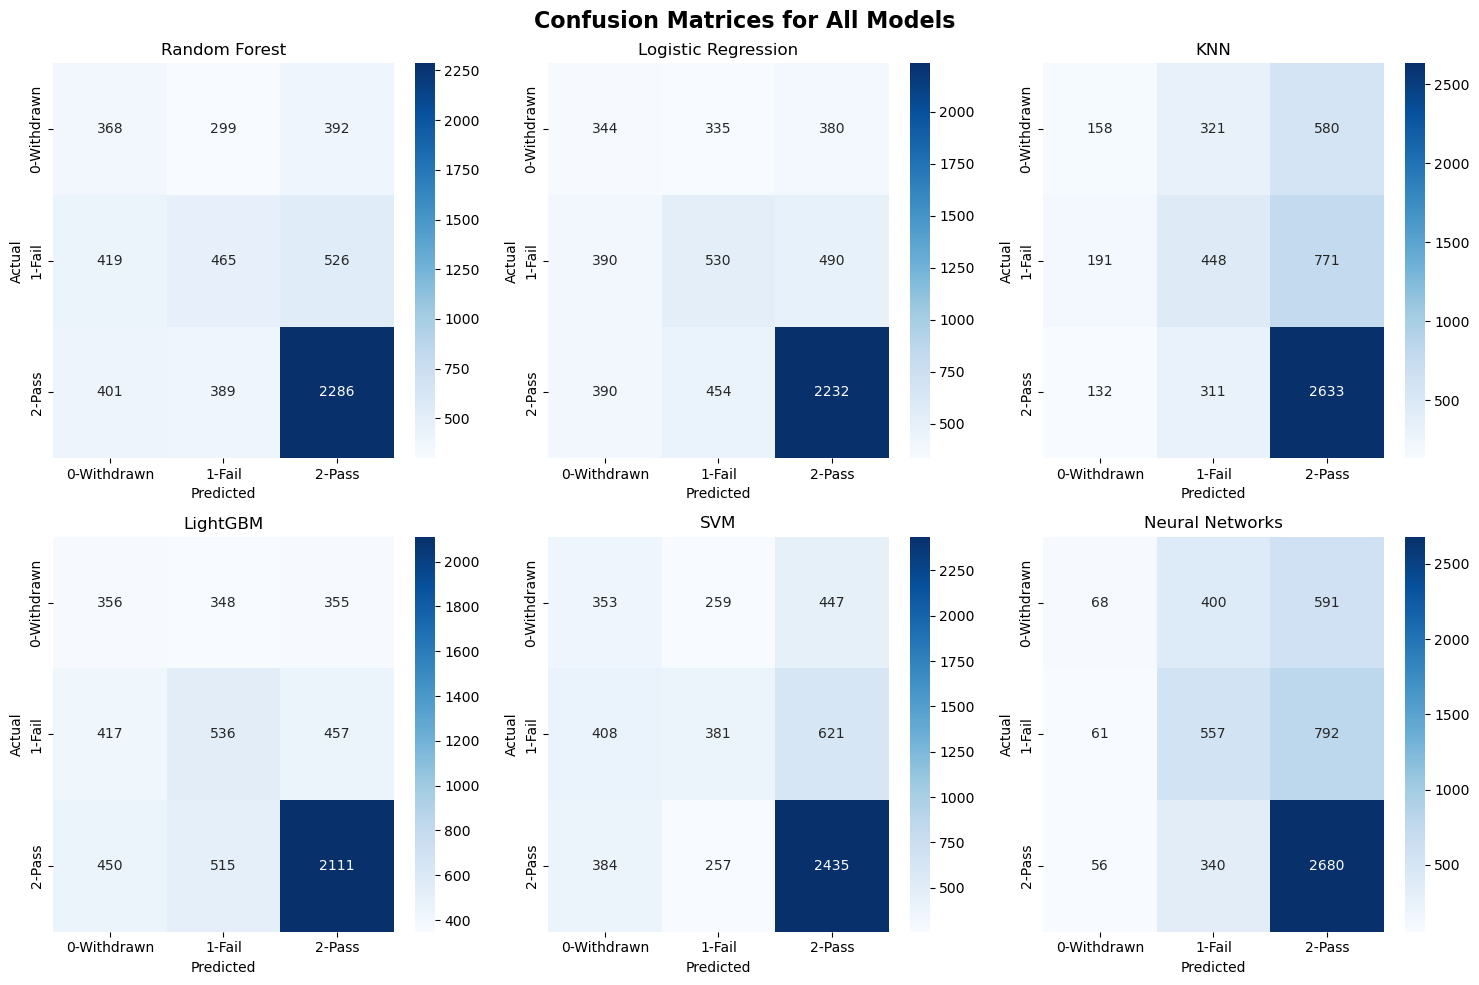


⚖️  CREATING CLASS IMBALANCE VISUALIZATION


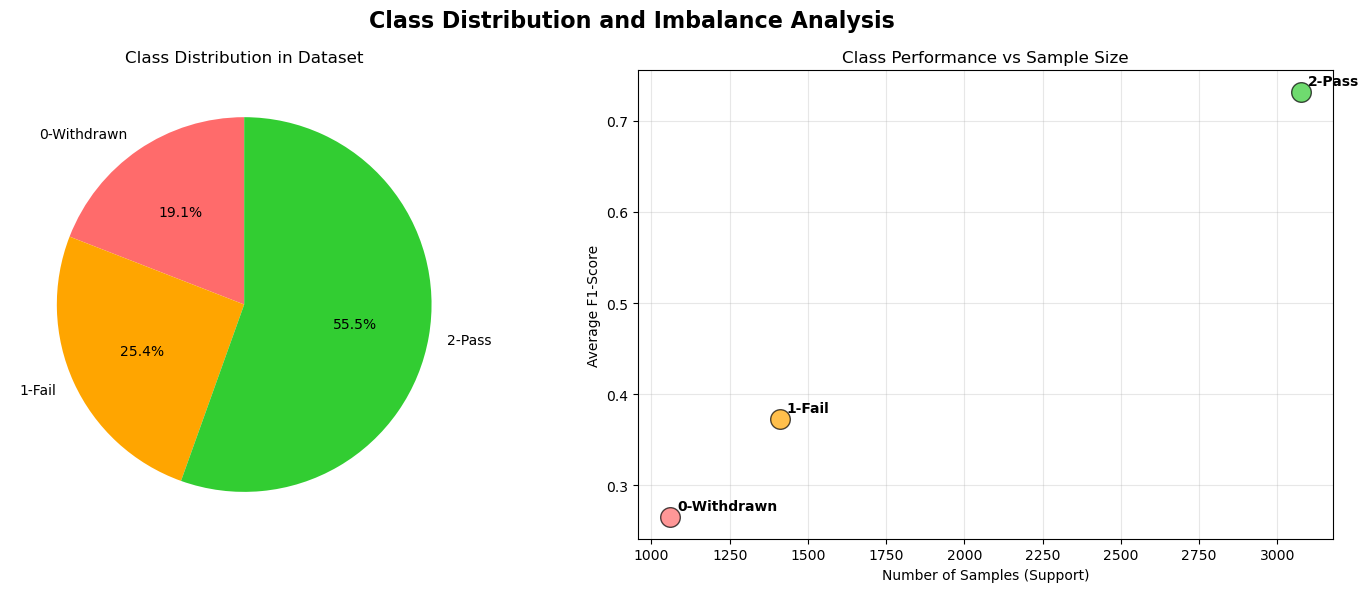

In [8]:
# ================================================================
# 6. Class-Level Performance Visualizations and Plots
# ================================================================

if all_classification_reports and class_labels:
    print(f"\n📊 CREATING CLASS-LEVEL PERFORMANCE VISUALIZATIONS")
    print("=" * 55)
    
    # Create class-level performance comparison with proper labels
    class_performance_data = []
    class_labels_map = {0: '0-Withdrawn', 1: '1-Fail', 2: '2-Pass'}
    
    for model_name, class_report in all_classification_reports.items():
        for class_id in class_labels:
            if class_id in class_report:
                class_info = class_report[class_id]
                class_label = class_labels_map.get(int(class_id), f"Class {class_id}")
                class_performance_data.append({
                    'Model': model_name,
                    'Class': class_label,
                    'Precision': class_info['precision'],
                    'Recall': class_info['recall'],
                    'F1-Score': class_info['f1-score'],
                    'Support': class_info['support']
                })
    
    class_performance_df = pd.DataFrame(class_performance_data)
    
    # Create class performance visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Class-Level Performance Analysis', fontsize=16, fontweight='bold')
    
    # 1. F1-Score by Class and Model (Heatmap)
    ax1 = axes[0, 0]
    class_pivot = class_performance_df.pivot(index='Model', columns='Class', values='F1-Score')
    sns.heatmap(class_pivot, annot=True, cmap='RdYlGn', center=0.5, ax=ax1, fmt='.3f')
    ax1.set_title('F1-Score by Class and Model')
    ax1.set_xlabel('Class')
    ax1.set_ylabel('Model')
    
    # 2. Precision by Class and Model (Heatmap)
    ax2 = axes[0, 1]
    precision_pivot = class_performance_df.pivot(index='Model', columns='Class', values='Precision')
    sns.heatmap(precision_pivot, annot=True, cmap='RdYlGn', center=0.5, ax=ax2, fmt='.3f')
    ax2.set_title('Precision by Class and Model')
    ax2.set_xlabel('Class')
    ax2.set_ylabel('Model')
    
    # 3. Recall by Class and Model (Heatmap)
    ax3 = axes[1, 0]
    recall_pivot = class_performance_df.pivot(index='Model', columns='Class', values='Recall')
    sns.heatmap(recall_pivot, annot=True, cmap='RdYlGn', center=0.5, ax=ax3, fmt='.3f')
    ax3.set_title('Recall by Class and Model')
    ax3.set_xlabel('Class')
    ax3.set_ylabel('Model')
    
    # 4. Class Performance Distribution (Box Plot)
    ax4 = axes[1, 1]
    
    # Box plot showing F1-score distribution across models for each class
    class_f1_data = []
    class_names = []
    for class_id in class_labels:
        class_label = class_labels_map.get(int(class_id), f"Class {class_id}")
        class_data = class_performance_df[class_performance_df['Class'] == class_label]
        class_f1_data.append(class_data['F1-Score'].values)
        class_names.append(class_label)
    
    ax4.boxplot(class_f1_data, labels=class_names)
    ax4.set_title('F1-Score Distribution by Class')
    ax4.set_xlabel('Class')
    ax4.set_ylabel('F1-Score')
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # ================================================================
    # CONFUSION MATRICES VISUALIZATION
    # ================================================================
    
    print(f"\n🎯 CREATING CONFUSION MATRICES FOR ALL MODELS")
    print("=" * 50)
    
    # Create confusion matrices visualization
    n_models = len(all_confusion_matrices)
    n_cols = 3  # 3 columns
    n_rows = (n_models + n_cols - 1) // n_cols  # Calculate required rows
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    fig.suptitle('Confusion Matrices for All Models', fontsize=16, fontweight='bold')
    
    # Flatten axes array if it's not already flat
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    elif n_cols == 1:
        axes = axes.reshape(-1, 1)
    
    model_index = 0
    for i in range(n_rows):
        for j in range(n_cols):
            if model_index < len(all_confusion_matrices):
                model_name = list(all_confusion_matrices.keys())[model_index]
                cm_df = all_confusion_matrices[model_name]
                
                # Create proper class labels for confusion matrix
                class_labels_ordered = ['0-Withdrawn', '1-Fail', '2-Pass']
                
                # Convert confusion matrix to use proper labels
                cm_array = cm_df.values
                
                # Create heatmap
                ax = axes[i, j]
                sns.heatmap(cm_array, 
                           annot=True, 
                           fmt='d', 
                           cmap='Blues',
                           xticklabels=class_labels_ordered,
                           yticklabels=class_labels_ordered,
                           ax=ax)
                ax.set_title(f'{model_name}')
                ax.set_xlabel('Predicted')
                ax.set_ylabel('Actual')
                
                model_index += 1
            else:
                # Hide empty subplots
                axes[i, j].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # ================================================================
    # CLASS SUPPORT AND IMBALANCE VISUALIZATION
    # ================================================================
    
    print(f"\n⚖️  CREATING CLASS IMBALANCE VISUALIZATION")
    print("=" * 45)
    
    # Create class imbalance visualization
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    fig.suptitle('Class Distribution and Imbalance Analysis', fontsize=16, fontweight='bold')
    
    # 1. Class Distribution Pie Chart
    ax1 = axes[0]
    
    # Get class support (should be same across all models)
    class_supports = {}
    for class_label in class_performance_df['Class'].unique():
        class_data = class_performance_df[class_performance_df['Class'] == class_label]
        class_supports[class_label] = int(class_data['Support'].iloc[0])
    
    # Create pie chart
    colors = ['#ff6b6b', '#ffa500', '#32cd32']  # Red, Orange, Green
    wedges, texts, autotexts = ax1.pie(class_supports.values(), 
                                      labels=class_supports.keys(),
                                      colors=colors,
                                      autopct='%1.1f%%',
                                      startangle=90)
    ax1.set_title('Class Distribution in Dataset')
    
    # 2. Class Performance vs Support Scatter
    ax2 = axes[1]
    
    # Calculate average performance and support for each class
    class_avg_performance = class_performance_df.groupby('Class').agg({
        'F1-Score': 'mean',
        'Support': 'first'  # Support should be same for all models
    }).reset_index()
    
    # Create scatter plot
    for _, row in class_avg_performance.iterrows():
        color = class_colors_dict.get(row['Class'], '#1f4e79')
        ax2.scatter(row['Support'], row['F1-Score'], 
                   color=color, s=200, alpha=0.7, edgecolors='black')
        ax2.annotate(row['Class'], (row['Support'], row['F1-Score']), 
                    xytext=(5, 5), textcoords='offset points', fontweight='bold')
    
    ax2.set_xlabel('Number of Samples (Support)')
    ax2.set_ylabel('Average F1-Score')
    ax2.set_title('Class Performance vs Sample Size')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

else:
    print(f"\n⚠️  Classification reports not available for plotting visualizations")
    print("Please ensure all_classification_reports and class_labels are properly loaded.")